# # Step 1: Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import ast

# # Step 2: Load the dataset from CSV file

In [2]:
csv_file_path = '/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv'  # Update with your CSV file path
df = pd.read_csv(csv_file_path)

In [3]:
df.head(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

In [5]:
df.shape

(6392, 19)

# # Step 3: Preprocessing the image paths

In [6]:
# This step is appending the full file path to the left and right fundus images for each entry in DataFrame 
image_dir = '/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images'  # Update with your images directory
df['Left-Fundus'] = df['Left-Fundus'].apply(lambda x: os.path.join(image_dir, x))
df['Right-Fundus'] = df['Right-Fundus'].apply(lambda x: os.path.join(image_dir, x))

In [7]:
df.head(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,/kaggle/input/ocular-disease-recognition-odir5...,/kaggle/input/ocular-disease-recognition-odir5...,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,/kaggle/input/ocular-disease-recognition-odir5...,/kaggle/input/ocular-disease-recognition-odir5...,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,/kaggle/input/ocular-disease-recognition-odir5...,/kaggle/input/ocular-disease-recognition-odir5...,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,/kaggle/input/ocular-disease-recognition-odir5...,/kaggle/input/ocular-disease-recognition-odir5...,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,/kaggle/input/ocular-disease-recognition-odir5...,/kaggle/input/ocular-disease-recognition-odir5...,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


# # Step 4: Filter dataset to include only rows where both images exist

In [8]:
df = df[df['Left-Fundus'].apply(os.path.exists) & df['Right-Fundus'].apply(os.path.exists)]

In [9]:
df.shape

(6068, 19)

# # Step 5: Prepare input (X) and output (y) data

In [10]:
X = []  # List to store image data
y = []  # List to store labels

In [11]:
disease_labels = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']
label_mapping = {label: idx for idx, label in enumerate(disease_labels)}

In [12]:
# Step 7: Iterate through each row to process images and labels
for _, row in df.iterrows():
    left_img = cv2.imread(row['Left-Fundus'])
    right_img = cv2.imread(row['Right-Fundus'])
    
    # Resize images to 128x128
    left_img = cv2.resize(left_img, (128, 128))
    right_img = cv2.resize(right_img, (128, 128))
    
    # Stack left and right images to create a two-channel input
    combined_img = np.concatenate((left_img, right_img), axis=-1)  # Combine channels
    
    # Append the image to X
    X.append(combined_img)
    
    # Step 8: Create a target vector (one-hot encoding) for labels
    target_vector = np.zeros(len(disease_labels))
    labels = ast.literal_eval(row['labels'])  # Safely evaluate string to list
    
    for label in labels:
        target_vector[label_mapping[label]] = 1  # Assign 1 for each disease in the label list
    
    y.append(target_vector)

# # Step 9: Convert lists to numpy arrays and normalize images

In [13]:
X = np.array(X, dtype='float32') / 255.0  # Normalize pixel values between 0 and 1
y = np.array(y)

In [14]:
# Step 10: Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Print dataset shapes
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (4854, 128, 128, 6)
y_train shape: (4854, 8)
x_test shape: (1214, 128, 128, 6)
y_test shape: (1214, 8)


In [46]:
# Step 11: Define the CNN model
model = Sequential()
model.add(Input(shape=(128, 128, 6)))  # Input layer (128x128 image with 6 channels for both eyes)
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # Flatten output to feed into Dense layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(len(disease_labels), activation='softmax'))  # Output layer for multi-class classification

In [47]:
# Step 12: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
# Step 13: Set up checkpoints and early stopping
checkpoint = ModelCheckpoint('model_best.keras', monitor='val_accuracy', save_best_only=True)
# earlystop = EarlyStopping(monitor='val_loss', patience=5)

In [49]:
# Step 14: Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=35,
                    validation_data=(x_test, y_test),
                    verbose=1, callbacks=[checkpoint])  # Removed earlystop


Epoch 1/35
152/152 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.4136 - loss: 1.6592 - val_accuracy: 0.4357 - val_loss: 1.5080
Epoch 2/35
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4455 - loss: 1.5250 - val_accuracy: 0.4366 - val_loss: 1.4860
Epoch 3/35
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4266 - loss: 1.5292 - val_accuracy: 0.4407 - val_loss: 1.4482
Epoch 4/35
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4575 - loss: 1.4419 - val_accuracy: 0.4720 - val_loss: 1.3874
Epoch 5/35
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4646 - loss: 1.4115 - val_accuracy: 0.4712 - val_loss: 1.3791
Epoch 6/35
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4752 - loss: 1.3717 - val_accuracy: 0.4580 - val_loss: 1.3834
Epoch 7/35
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4813 - loss: 1.3373 - val_accuracy: 0.4671 - val_loss: 1.3352
Epoch 8/35
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5012 - loss: 1.3020 - val_acc

In [51]:
# Step 15: Save the final model
model.save('final_model.keras')

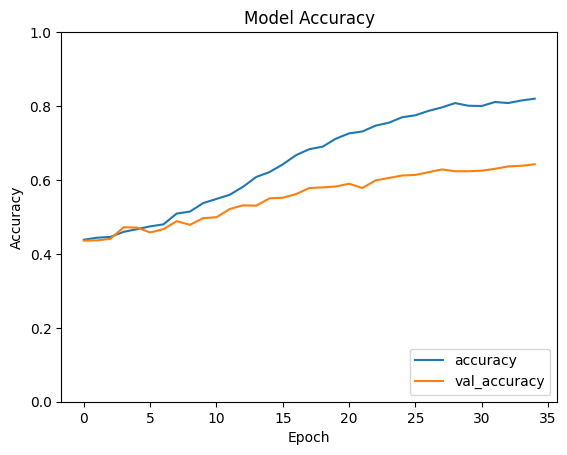

In [52]:
# Step 16: Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()

In [53]:
# Step 17: Count the number of images per disease
# This shows how many images are associated with each disease category
disease_counts = {label: 0 for label in disease_labels}

for _, row in df.iterrows():
    labels = ast.literal_eval(row['labels'])
    for label in labels:
        disease_counts[label] += 1

# Print the number of images per disease
print("Number of images per disease:")
for label, count in disease_counts.items():
    print(f"{label}: {count}")

Number of images per disease:
N: 2873
D: 1608
G: 284
C: 293
A: 266
H: 128
M: 232
O: 708


In [54]:
from sklearn.metrics import classification_report, accuracy_score

# Step 18: Evaluate the model on test data
y_pred = model.predict(x_test)

# Convert predictions and true labels back to single label by taking the index of the maximum value
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Step 19: Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy: {accuracy:.4f}")

# Step 20: Generate classification report (includes precision, recall, F1-score)
report = classification_report(y_test_labels, y_pred_labels, target_names=disease_labels)
print("Classification Report:\n", report)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Accuracy: 0.6425
Classification Report:
               precision    recall  f1-score   support

           N       0.65      0.74      0.69       530
           D       0.71      0.65      0.68       327
           G       0.70      0.46      0.55        50
           C       0.61      0.69      0.65        51
           A       0.89      0.62      0.73        66
           H       0.78      0.90      0.84        20
           M       0.78      0.82      0.80        39
           O       0.25      0.21      0.22       131

    accuracy                           0.64      1214
   macro avg       0.67      0.64      0.65      1214
weighted avg       0.64      0.64      0.64      1214



In [ ]:
import numpy as np
import cv2
from keras.models import load_model

# Step 1: Load the saved model
model = load_model('final_model.keras')

# Disease labels mapping
disease_labels = ['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']

# Step 2: Function to preprocess the images
def preprocess_images(left_image_path, right_image_path):
    # Load the left and right fundus images
    left_img = cv2.imread(left_image_path)
    right_img = cv2.imread(right_image_path)
    
    # Resize images to the same size used during training (128x128)
    left_img = cv2.resize(left_img, (128, 128))
    right_img = cv2.resize(right_img, (128, 128))
    
    # Normalize the images (convert pixel values to range [0, 1])
    left_img = left_img.astype('float32') / 255.0
    right_img = right_img.astype('float32') / 255.0
    
    # Stack the left and right images along the channel axis to create a 6-channel input
    combined_img = np.concatenate((left_img, right_img), axis=-1)
    
    # Add an extra dimension to make it batch-like (1, 128, 128, 6) for prediction
    combined_img = np.expand_dims(combined_img, axis=0)
    
    return combined_img

# Step 3: Function to make predictions
def predict_disease(left_image_path, right_image_path):
    # Preprocess the images
    input_data = preprocess_images(left_image_path, right_image_path)
    
    # Step 4: Make predictions using the loaded model
    prediction = model.predict(input_data)
    
    # Step 5: Get the index of the highest probability (predicted class)
    predicted_label_idx = np.argmax(prediction, axis=1)[0]
    
    # Map the predicted index to the corresponding disease label
    predicted_disease = disease_labels[predicted_label_idx]
    
    # Get the confidence level for the predicted class
    confidence_score = prediction[0][predicted_label_idx]  # Confidence for the predicted class
    
    return predicted_disease, confidence_score, prediction[0]  # Return probabilities for all classes

# Step 6: Example usage
left_image_path = '/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/1045_left.jpg'   # Update with the actual path
right_image_path = '/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/1045_right.jpg'  # Update with the actual path

predicted_result, confidence, probabilities = predict_disease(left_image_path, right_image_path)

# Output the results
print(f"Predicted Disease: {predicted_result}")
print(f"Confidence: {confidence:.2f}")  # Display confidence as a percentage
print("Probabilities for all classes:")
for label, prob in zip(disease_labels, probabilities):
    print(f"{label}: {prob:.2f}")  # Display probabilities as decimals


In [60]:
import pandas as pd

# Load the CSV file
csv_file_path = '/kaggle/input/ocular-disease-recognition-odir5k/full_df.csv'  # Update with your CSV file path
df = pd.read_csv(csv_file_path)

# Print the first row of the dataset
print(df.iloc[10])


ID                                                                          11
Patient Age                                                                 60
Patient Sex                                                             Female
Left-Fundus                                                        11_left.jpg
Right-Fundus                                                      11_right.jpg
Left-Diagnostic Keywords     moderate non proliferative retinopathy，hyperte...
Right-Diagnostic Keywords    moderate non proliferative retinopathy，hyperte...
N                                                                            0
D                                                                            1
G                                                                            0
C                                                                            0
A                                                                            0
H                                                   